# Data loading

In [1]:
import copy
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
jar = pd.read_csv('fuel_swelling_20240109.txt', sep=' ')
columns_drop = ['%eval_id', 'interface', 'FD1', 'FD2', 'FD3', 'fuel_swelling1', 'fuel_swelling2']
jar.drop(columns=columns_drop, inplace=True)

In [3]:
jar

,dGrainHBS,FaceCovMax,SwellLink,vResol,DatomFissGBx,fNucleate,aAtomDifFiss,fuel_swelling3
0,0.000044,0.725,0.02270,1.907000e-18,29010.0,6.315000e-10,5.296000e-31,44.947087
1,0.000048,0.899,0.02587,2.074000e-18,28080.0,6.653000e-10,5.740000e-31,42.531250
2,0.000045,0.835,0.02241,2.134000e-18,35430.0,6.577000e-10,5.252000e-31,42.858313
3,0.000046,0.628,0.02796,1.870000e-18,31140.0,5.596000e-10,5.104000e-31,47.988939
4,0.000042,0.725,0.02707,1.696000e-18,27470.0,6.026000e-10,5.070000e-31,43.136858
...,...,...,...,...,...,...,...,...
3195,0.000038,0.787,0.02303,2.002000e-18,28810.0,5.710000e-10,4.533000e-31,39.049876
3196,0.000039,0.743,0.02428,1.664000e-18,24780.0,6.381000e-10,5.127000e-31,41.342469
3197,0.000038,0.800,0.02456,1.751000e-18,31310.0,5.117000e-10,5.247000e-31,39.040535
3198,0.000046,0.795,0.02365,2.136000e-18,36170.0,5.038000e-10,5.705000e-31,44.282862


<Axes: >

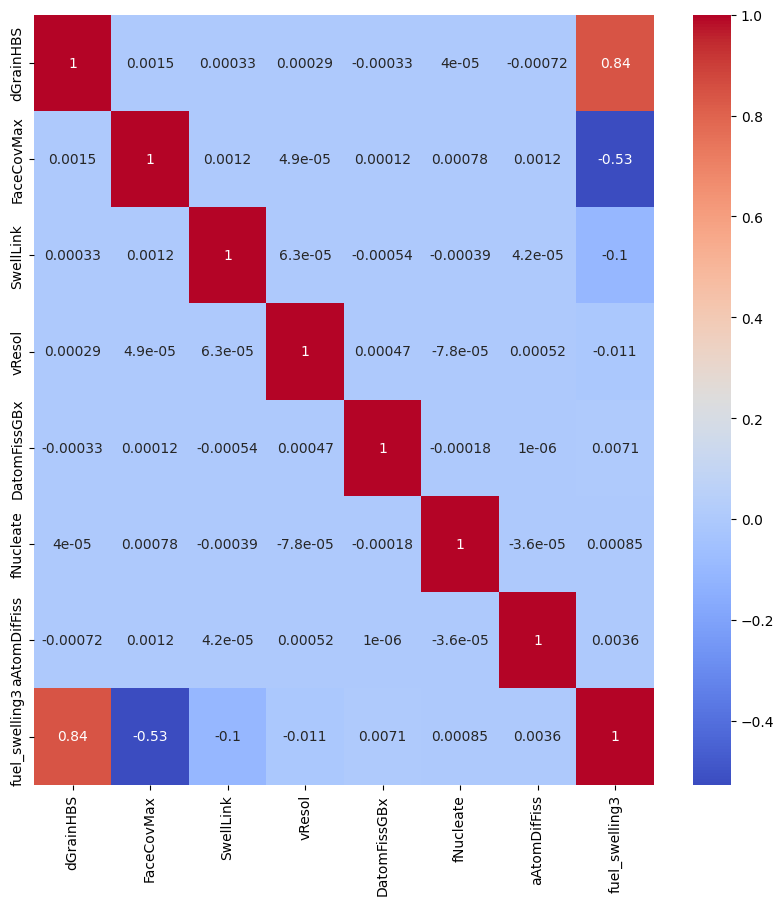

In [4]:
plt.figure(figsize=(10,10))
sns.heatmap(jar.corr(), annot=True, cmap='coolwarm')

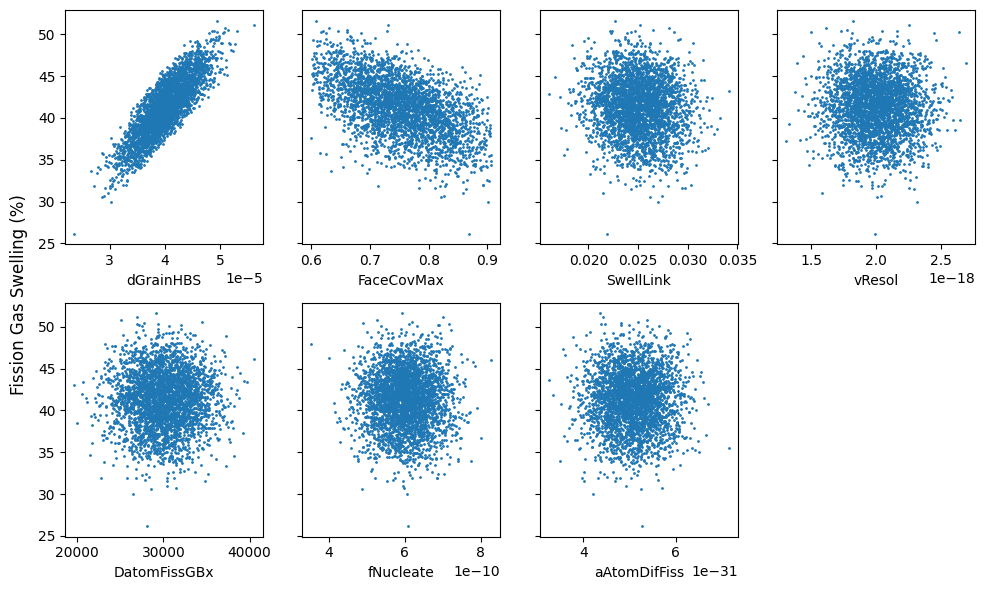

In [5]:
fig, axes = plt.subplots(nrows=2, ncols=4, sharey=True, figsize=(10, 6))

for i, ax in enumerate(axes.flatten()):
    ax.scatter(jar.iloc[:,i], jar.iloc[:,7], s=1)
    ax.set_xlabel(jar.columns[i])
    #ax.set_ylabel(jar.columns[-1])

fig.delaxes(axes[1,3])
fig.supylabel('Fission Gas Swelling (%)')
plt.tight_layout()
plt.show()

In [6]:
tjar = jar.sample(frac=0.2)

In [7]:
tjar

,dGrainHBS,FaceCovMax,SwellLink,vResol,DatomFissGBx,fNucleate,aAtomDifFiss,fuel_swelling3
131,0.000036,0.711,0.02772,1.996000e-18,29240.0,5.843000e-10,4.385000e-31,39.383387
2712,0.000043,0.665,0.02864,1.999000e-18,34370.0,5.527000e-10,5.106000e-31,44.907177
3194,0.000045,0.811,0.02494,2.039000e-18,31210.0,5.241000e-10,5.324000e-31,43.357508
1104,0.000038,0.658,0.01916,1.790000e-18,32610.0,5.632000e-10,5.739000e-31,43.099276
70,0.000035,0.712,0.02631,2.141000e-18,36960.0,4.739000e-10,4.863000e-31,38.828245
...,...,...,...,...,...,...,...,...
282,0.000038,0.751,0.02282,1.806000e-18,32270.0,6.617000e-10,5.290000e-31,40.421555
2859,0.000030,0.711,0.02266,1.937000e-18,21440.0,6.217000e-10,5.493000e-31,34.720675
157,0.000039,0.672,0.02500,1.843000e-18,25150.0,6.198000e-10,4.435000e-31,42.617899
2118,0.000046,0.840,0.02190,2.138000e-18,26300.0,4.467000e-10,4.295000e-31,43.379547


In [8]:
tjar.count()

dGrainHBS         640
FaceCovMax        640
SwellLink         640
vResol            640
DatomFissGBx      640
fNucleate         640
aAtomDifFiss      640
fuel_swelling3    640
dtype: int64

<Axes: >

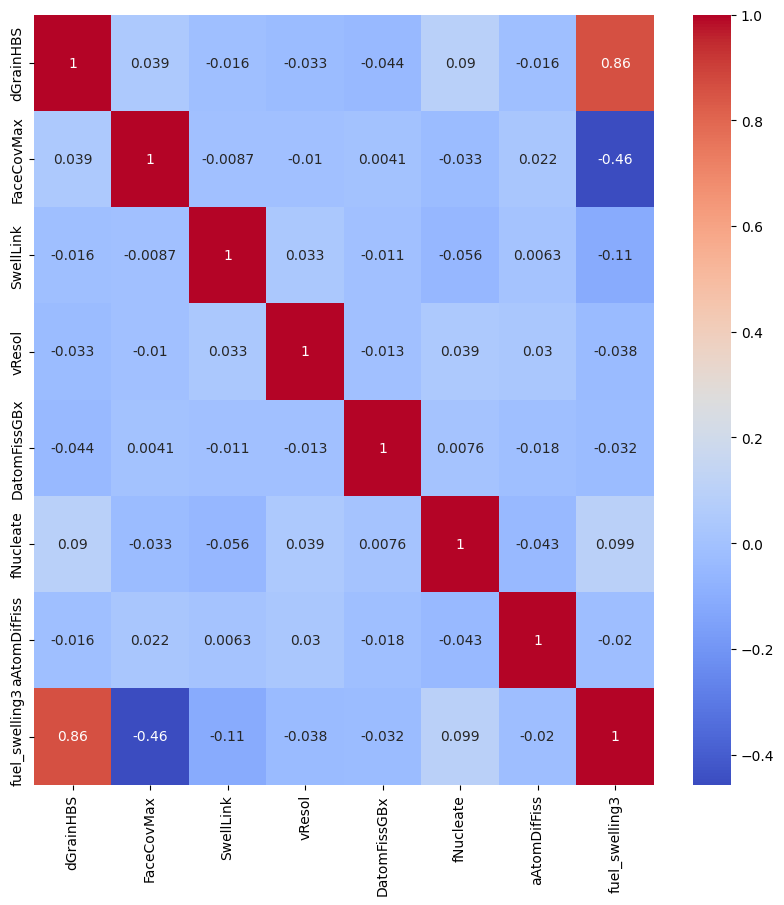

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(tjar.corr(), annot=True, cmap='coolwarm')

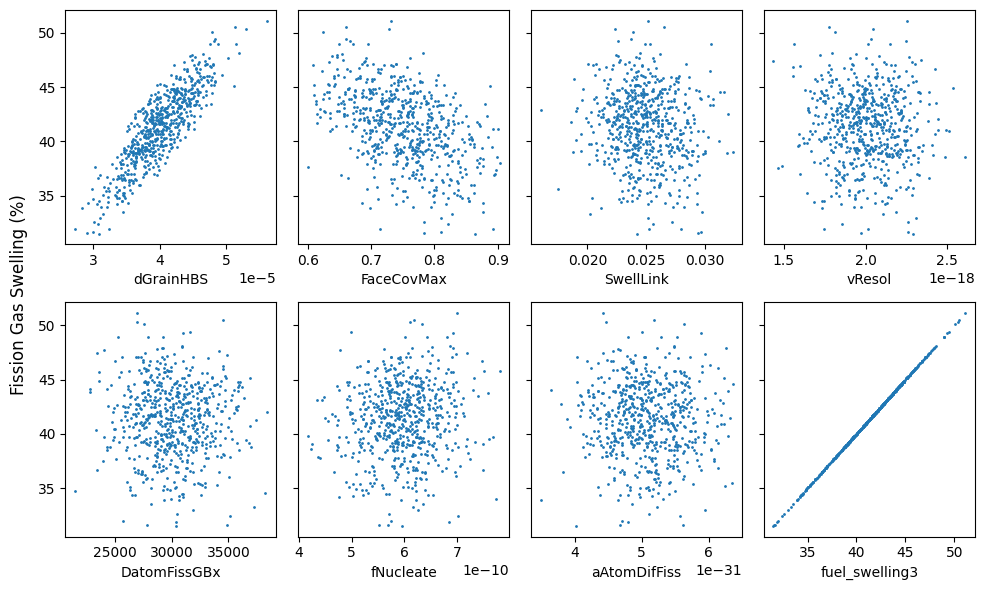

In [10]:
fig, axes = plt.subplots(nrows=2, ncols=4, sharey=True, figsize=(10, 6))

for i, ax in enumerate(axes.flatten()):
    ax.scatter(tjar.iloc[:,i], tjar.iloc[:,7], s=1)
    ax.set_xlabel(tjar.columns[i])

fig.supylabel('Fission Gas Swelling (%)')
plt.tight_layout()
plt.show()

# GP model

In [11]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, Matern, DotProduct, WhiteKernel

In [12]:
feat_ind = list(range(7))
features = tjar.iloc[:, feat_ind]
xscaler = StandardScaler()
X = xscaler.fit_transform(features)
y = tjar['fuel_swelling3']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
#kernel = 1 * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))
kernel = DotProduct() + WhiteKernel()
gpreg = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
gpreg.fit(X_train, y_train)

GaussianProcessRegressor(kernel=DotProduct(sigma_0=1) + WhiteKernel(noise_level=1),
                         n_restarts_optimizer=9)

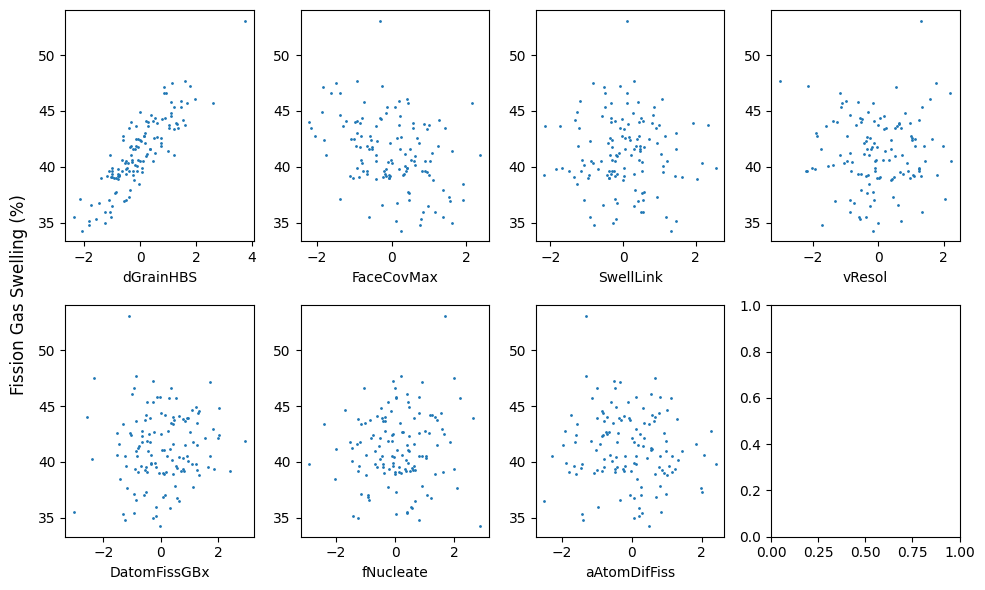

In [15]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(10, 6))

y_pred = gpreg.predict(X_test)
for i, ax in enumerate(axes.flatten()[:-1]):
    ax.scatter(X_test[:,i], y_pred, s=1)
    ax.set_xlabel(jar.columns[i])

fig.supylabel('Fission Gas Swelling (%)')
plt.tight_layout()
plt.show()

In [16]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.994076617773391

# MCMC

In [17]:
def target_dist(x):
    mu = 45
    sig = 2
    return np.exp(-0.5 * ((x-mu)/sig)**2)

def candidate_dist(x, sig=0.5):
    return np.random.normal(x, sig)
    
def mod_mcmc_sampler(num_param, num_samples, initial_state, proposal_sigma, model):
    samples = [initial_state]

    for ii in range(num_samples):
        current_state = samples[-1]
        
        for jj in range(num_param):
            current_p = current_state[jj]
            proposed_p = 10
            while (abs(proposed_p) > 5):
                proposed_p = candidate_dist(current_p, proposal_sigma)

            proposed_state = copy.deepcopy(current_state)
            proposed_state[jj] = proposed_p
            theta1 = model.predict([[*current_state]])[0]
            theta2 = model.predict([[*proposed_state]])[0]

            #acceptance_ratio = target_dist(proposed_state) / target_dist(current_state)
            acceptance_ratio = target_dist(theta2) / target_dist(theta1)

            if np.random.rand() < acceptance_ratio:
                current_state = proposed_state

        samples.append(current_state)

    return np.array(samples)

In [21]:
hey = mod_mcmc_sampler(7, 20000, np.zeros(7), 0.3, gpreg)

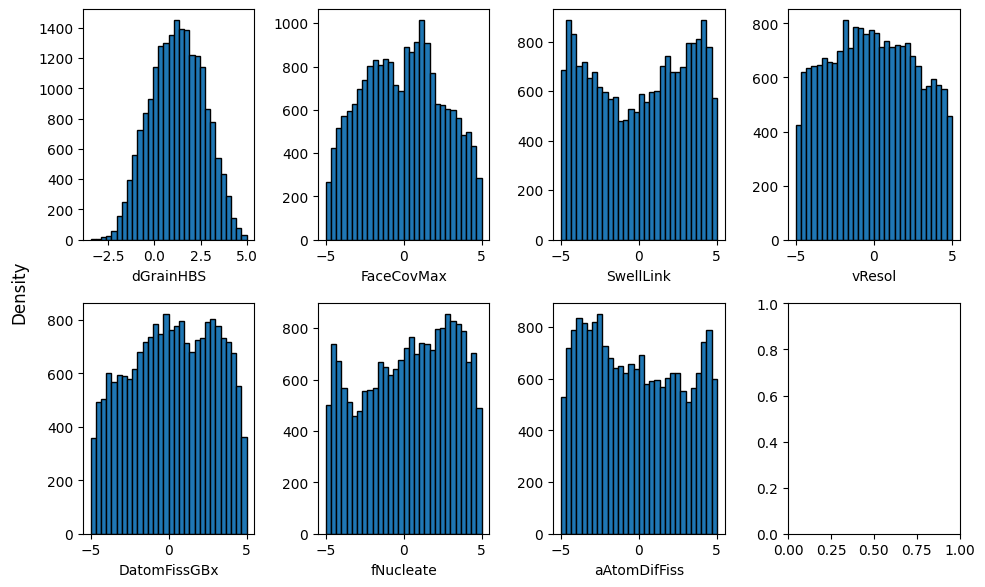

In [22]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(10, 6))

for i, ax in enumerate(axes.flatten()[:-1]):
    ax.hist(hey[:,i], bins=30, ec='k')
    ax.set_xlabel(jar.columns[i])
    ax.set_ylabel('')

fig.supylabel('Density')
plt.tight_layout()
plt.show()

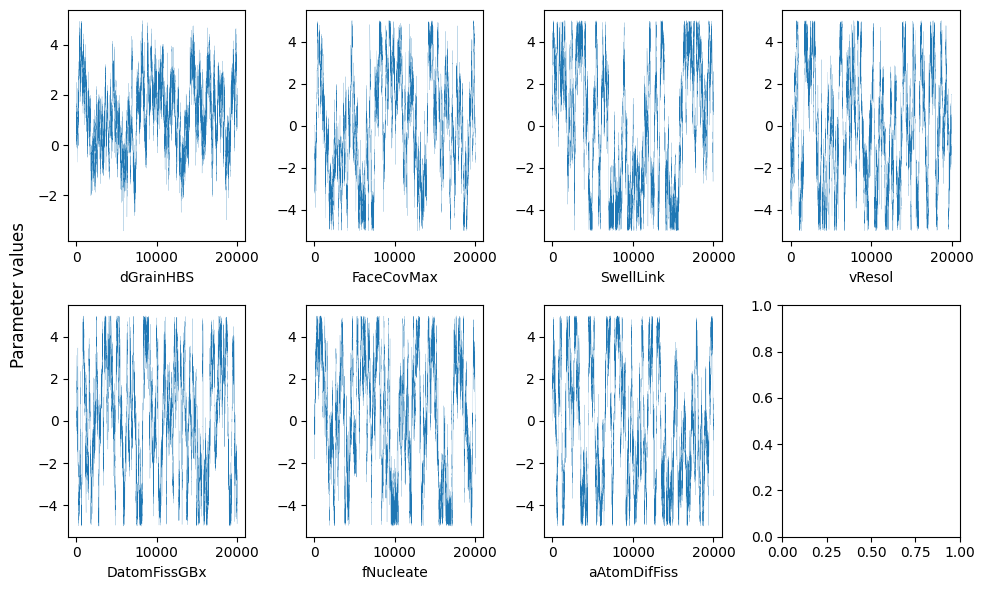

In [23]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(10, 6))

for i, ax in enumerate(axes.flatten()[:-1]):
    ax.plot(hey[:,i], lw=0.1)
    ax.set_xlabel(jar.columns[i])

fig.supylabel('Parameter values')
plt.tight_layout()
plt.show()